In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import scikitplot as skplt

In [2]:
data = pd.read_csv("D:\\Ayesha\\IBA Data Science\\Semester 3\\ML II\\pd_speech_features\\pd_speech_features.csv",header=1)

In [3]:
data = data.drop('id',axis=1)

In [4]:
data.head(3)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1


In [5]:
#XGBoost, RF, SVM and LR

In [6]:
X=data.drop('class',axis=1)
Y=data['class']

In [7]:
def validationmetrics(model, testX, testY, verbose=True):  
    global predictions
    
    predictions = model.predict(testX)
    
    if model.__class__.__module__.startswith('lightgbm'):
        for i in range(0, predictions.shape[0]):
            predictions[i]= 1 if predictions[i] >= 0.5 else 0
    
    #Accuracy
    accuracy = accuracy_score(testY, predictions)*100
    
    result1 = classification_report(testY, predictions)
    print("Classification Report:",)
    print (result1)
    
    #Precision
    precision = precision_score(testY, predictions, pos_label=1, labels=[0,1])*100
    
    #Recall
    recall = recall_score(testY, predictions,pos_label=1,labels=[0,1])*100
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    auc_val = auc(fpr, tpr)
    
    #F-Score
    f_score = f1_score(testY, predictions)
    

    if verbose:
        print("Prediction Vector: \n", predictions)
        print("\n Accuracy: \n", accuracy)
        print("\n Precision of event Happening: \n", precision)
        print("\n Recall of event Happening: \n", recall)
        print("\n AUC: \n",auc_val)
        print("\n F-Score:\n", f_score)
        #confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
    
    res_map = {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "auc_val": auc_val,
                "f_score": f_score,
                "model_obj": model
              }
    
    return res_map

In [8]:
def LogReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def SVM(trainX, testX, trainY, testY, svmtype="SVC", verbose=True, clf=None):
    # for one vs all
    if not clf:
        if svmtype == "Linear":
            clf = svm.LinearSVC()
        else:
            clf = svm.SVC()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def RandomForest(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = RandomForestClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

# 1- Random Forest Selection

In [9]:
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

std_delta_delta_log_energy     0.016349
tqwt_maxValue_dec_13           0.012700
std_delta_log_energy           0.012587
tqwt_TKEO_std_dec_12           0.011700
tqwt_entropy_shannon_dec_13    0.010168
                                 ...   
tqwt_meanValue_dec_2           0.000000
tqwt_meanValue_dec_1           0.000000
tqwt_meanValue_dec_27          0.000000
tqwt_meanValue_dec_28          0.000000
gender                         0.000000
Length: 753, dtype: float64

In [10]:
import matplotlib
import matplotlib.pyplot as plt

def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From Random Forest Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From Random Forest Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From Random Forest Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From Random Forest Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    
    

Index(['apq11Shimmer', 'std_Log_energy', 'std_delta_log_energy',
       'std_delta_delta_log_energy', 'std_9th_delta_delta'],
      dtype='object')
Logistic Regression From Random Forest Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      1.00      0.88       198

    accuracy                           0.79       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.79      0.70       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

 Accuracy: 
 79.2

 Precision of event Happening: 
 79.2

 Recall of event Happening: 
 100.0

 AUC: 
 0.5

 F-Score:
 0

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.52      0.47        52
           1       0.87      0.82      0.84       198

    accuracy                           0.76       250
   macro avg       0.65      0.67      0.66       250
weighted avg       0.78      0.76      0.76       250

Prediction Vector: 
 [0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1
 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.54      0.60        52
           1       0.89      0.93      0.91       198

    accuracy                           0.85       250
   macro avg       0.78      0.74      0.76       250
weighted avg       0.84      0.85      0.85       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 85.2

 Precision of event Happening: 
 88.51674641148325

 Recall of event Happening: 
 93.43434343434343



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.54      0.57        52
           1       0.88      0.90      0.89       198

    accuracy                           0.83       250
   macro avg       0.74      0.72      0.73       250
weighted avg       0.82      0.83      0.82       250

Prediction Vector: 
 [1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 82.8

 Precision of event Happening: 
 88.17733990147784

 Recall of event Happening: 
 90.40404040404042



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.62        52
           1       0.89      0.93      0.91       198

    accuracy                           0.86       250
   macro avg       0.79      0.75      0.77       250
weighted avg       0.85      0.86      0.85       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 85.6

 Precision of event Happening: 
 89.32038834951457

 Recall of event Happening: 
 92.92929292929293



# Interpretation
- Logistic Regression with Random Forest selection performs well on 10 features. the accuracy is 82.8, Precision 87 and recall 91.
- SVM with with Random Forest selection performs well on 10 features as accuracy is 81, precision is 83, recall is 94.
- RF with random forest selection performs very well on 15 features as accuracy is 85.2, precision is 90 and recall is 90.9.
- Xgboost with random forest selection performs well on 10 features as accuracy is 85.2, precision is 88 and recall is 93.


We concluded that LR, SVM, Xgboost with 10 features works really better with Random Forest selection as it is useful in minimizing the features. 
So if we want to select one model from random forest selection we will choose Xgboost (with 10 features).

# 2- XGBOOST SELECTION

In [12]:
model= XGBClassifier(n_estimators=100,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


tqwt_entropy_shannon_dec_13    0.045603
tqwt_TKEO_std_dec_12           0.035513
std_delta_delta_log_energy     0.028034
app_entropy_shannon_1_coef     0.020530
tqwt_medianValue_dec_31        0.019773
                                 ...   
det_TKEO_std_6_coef            0.000000
tqwt_entropy_log_dec_10        0.000000
tqwt_entropy_log_dec_9         0.000000
tqwt_entropy_log_dec_8         0.000000
gender                         0.000000
Length: 753, dtype: float32

In [13]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(XGBClassifier(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs



# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From XGboost Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From XGboost Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From XGboost Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From XGboost Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
 

[12:15:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['std_delta_delta_log_energy', 'std_10th_delta_delta',
       'det_TKEO_mean_8_coef', 'app_LT_TKEO_mean_1_coef',
       'tqwt_TKEO_std_dec_12'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.21      1.00      0.34        52
           1       0.00      0.00      0.00       198

    accuracy                           0.21       250
   macro avg       0.10      0.50      0.17       250
weighted avg       0.04      0.21      0.07       250

Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\met

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        52
           1       0.89      0.92      0.91       198

    accuracy                           0.85       250
   macro avg       0.77      0.75      0.76       250
weighted avg       0.84      0.85      0.84       250

Prediction Vector: 
 [0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 84.8

 Precision of event Happening: 
 89.2156862745098

 Recall of event Happening: 
 91.91919191919192

 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        52
           1       0.88      0.90      0.89       198

    accuracy                           0.82       250
   macro avg       0.73      0.72      0.72       250
weighted avg       0.82      0.82      0.82       250

Prediction Vector: 
 [0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 82.39999999999999

 Precision of event Happening: 
 88.11881188118812

 Recall of event Happening: 
 89.898

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['VFER_std', 'std_delta_delta_log_energy', 'std_10th_delta_delta',
       'det_TKEO_mean_8_coef', 'app_LT_TKEO_mean_1_coef',
       'tqwt_TKEO_mean_dec_21', 'tqwt_TKEO_std_dec_12',
       'tqwt_meanValue_dec_36', 'tqwt_minValue_dec_7', 'tqwt_maxValue_dec_11'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.21      1.00      0.34        52
           1       0.00      0.00      0.00       198

    accuracy                           0.21       250
   macro avg       0.10      0.50      0.17       250
weighted avg       0.04      0.21      0.07       250

Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\met

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.56      0.64        52
           1       0.89      0.95      0.92       198

    accuracy                           0.87       250
   macro avg       0.82      0.75      0.78       250
weighted avg       0.86      0.87      0.86       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 86.8

 Precision of event Happening: 
 89.0995260663507

 Recall of event Happening: 
 94.94949494949495

 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        52
           1       0.89      0.91      0.90       198

    accuracy                           0.84       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.84      0.84      0.84       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 84.39999999999999

 Precision of event Happening: 
 89.16256157635468

 Recall of event Happening: 
 91.414

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['VFER_std', 'std_MFCC_1st_coef', 'std_MFCC_11th_coef',
       'std_delta_delta_log_energy', 'std_10th_delta_delta',
       'det_TKEO_mean_8_coef', 'Ed2_1_coef', 'app_LT_TKEO_mean_1_coef',
       'tqwt_entropy_shannon_dec_19', 'tqwt_TKEO_mean_dec_21',
       'tqwt_TKEO_std_dec_12', 'tqwt_meanValue_dec_36', 'tqwt_stdValue_dec_17',
       'tqwt_minValue_dec_7', 'tqwt_maxValue_dec_11'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      0.97      0.87       198

    accuracy                           0.77       250
   macro avg       0.39      0.48      0.43       250
weighted avg       0.62      0.77      0.69       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.58      0.65        52
           1       0.90      0.95      0.92       198

    accuracy                           0.87       250
   macro avg       0.82      0.76      0.79       250
weighted avg       0.87      0.87      0.87       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 87.2

 Precision of event Happening: 
 89.52380952380953

 Recall of event Happening: 
 94.94949494949495



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        52
           1       0.89      0.90      0.90       198

    accuracy                           0.83       250
   macro avg       0.75      0.73      0.74       250
weighted avg       0.83      0.83      0.83       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1]

 Accuracy: 
 83.2

 Precision of event Happening: 
 88.61386138613861

 Recall of event Happening: 
 90.40404040404042



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['b2', 'VFER_std', 'std_MFCC_1st_coef', 'std_MFCC_11th_coef',
       'std_delta_delta_log_energy', 'std_10th_delta_delta',
       'det_TKEO_mean_8_coef', 'Ed2_1_coef', 'app_LT_TKEO_mean_1_coef',
       'tqwt_energy_dec_14', 'tqwt_energy_dec_33',
       'tqwt_entropy_shannon_dec_19', 'tqwt_TKEO_mean_dec_21',
       'tqwt_TKEO_std_dec_12', 'tqwt_meanValue_dec_36', 'tqwt_stdValue_dec_17',
       'tqwt_minValue_dec_7', 'tqwt_maxValue_dec_11', 'tqwt_maxValue_dec_25',
       'tqwt_kurtosisValue_dec_22'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      0.99      0.88       198

    accuracy                           0.78       250
   macro avg       0.40      0.49      0.44       250
weighted avg       0.63      0.78      0.70       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68        52
           1       0.90      0.96      0.93       198

    accuracy                           0.88       250
   macro avg       0.85      0.78      0.81       250
weighted avg       0.88      0.88      0.88       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 88.4

 Precision of event Happening: 
 90.04739336492891

 Recall of event Happening: 
 95.95959595959596



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.54      0.57        52
           1       0.88      0.91      0.90       198

    accuracy                           0.83       250
   macro avg       0.75      0.72      0.73       250
weighted avg       0.83      0.83      0.83       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 83.2

 Precision of event Happening: 
 88.23529411764706

 Recall of event Happening: 
 90.9090909090909

 

# Interpretation 
- Logistic Regression with xgboost feature selection doesnot perform well on the less number of features it perform well on 20 features with the accuracy 78.4, precision 79 and recall 98.
- SVM with xgboost feature selection perform almost same with more or less features so its better to select with less features. (accuracy 78.4, precision 79, recall 98.48)
- RF with xgboost selection performs well on 20 features with accuracy 86.6, precision 90.04 and recall 95.95.
- Xgboost with xgboost selection performs well on 10 features with accuracy 84.39, precision 89.16, recall 91.41.

We concluded that from xgboost selection RF model (with 10 features) performs well from all of them.

# 3- RFE

In [14]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [16]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From RFE Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From RFE Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From RFE Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From RFE Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)

 

Index(['std_delta_delta_log_energy', 'det_TKEO_mean_8_coef',
       'tqwt_entropy_shannon_dec_36', 'tqwt_TKEO_std_dec_12',
       'tqwt_meanValue_dec_36'],
      dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.21      1.00      0.34        52
           1       0.00      0.00      0.00       198

    accuracy                           0.21       250
   macro avg       0.10      0.50      0.17       250
weighted avg       0.04      0.21      0.07       250

Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classificat

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        52
           1       0.87      0.91      0.89       198

    accuracy                           0.83       250
   macro avg       0.74      0.71      0.72       250
weighted avg       0.82      0.83      0.82       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 82.8

 Precision of event Happening: 
 87.43961352657004

 Recall of event Happening: 
 91.41414141414141



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Prediction Vector: 
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 80.80000000000001

 Precision of event Happening: 
 87.12871287128714

 Recall of event Happening: 
 88.88888888888889

 AUC: 
 0.6944444444444444

 F-Score:
 0.88

 Confusion Matrix: 
 [[ 26  26]
 [ 22 176]]
Index(['std_7th_delta', 'std_delta_delta_log_energy', 'std_10th_delta_delta',
       'det_TKEO_mean_8_coef', 'tqwt_entropy_shannon_dec_36',
       'tqwt_TKEO_std_dec_12', 'tqwt_meanValue_dec_36', 'tqwt_stdValue_dec_33',
       'tqwt_skewnessValue_d

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55        52
           1       0.88      0.88      0.88       198

    accuracy                           0.81       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.81      0.81      0.81       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0
 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1]

 Accuracy: 
 81.2

 Precision of event Happening: 
 88.3248730964467

 Recall of event Happening: 
 87.87878787878788

 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.62        52
           1       0.90      0.91      0.90       198

    accuracy                           0.85       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.84      0.85      0.85       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

 Accuracy: 
 84.8

 Precision of event Happening: 
 89.60396039603961

 Recall of event Happening: 
 91.41414141414141



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        52
           1       0.87      0.90      0.89       198

    accuracy                           0.82       250
   macro avg       0.72      0.70      0.71       250
weighted avg       0.81      0.82      0.81       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0
 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1]

 Accuracy: 
 81.6

 Precision of event Happening: 
 87.25490196078431

 Recall of event Happening: 
 89.8989898989899

 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.56      0.60        52
           1       0.89      0.92      0.91       198

    accuracy                           0.85       250
   macro avg       0.77      0.74      0.76       250
weighted avg       0.84      0.85      0.84       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1]

 Accuracy: 
 84.8

 Precision of event Happening: 
 88.83495145631069

 Recall of event Happening: 
 92.42424242424242



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57        52
           1       0.89      0.89      0.89       198

    accuracy                           0.82       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.82      0.82      0.82       250

Prediction Vector: 
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 

# Interpretation
- Logistic Regression with RFE selection perform well with 10 features with an accuracy of 79, precision 79.67, recall 98.9.
- SVM with RFE selection perform well with 5 features with an accuracy 78, precision 79, recall 98.
- RF with RFE selection perform well with 10 features with an accuracy of 86.6, precision 91.45, recall 91.9.
- Xgboost with RFE selection performs well with 20 features with an accuracy of 82.39, precision 88.5, recall 89.39

We concluded that from RFE selection RF performs (with 10 features) model performs well from all of them.

# 4- LASSO FOR FEATURE SELECTION

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [18]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    # Use L1 penalty
    estimator = LassoCV(cv=5, normalize = True)
    fs = SelectFromModel(estimator,threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From L1 Based Feature Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From L1 Based Feature Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From L1 Based Feature Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From L1 Based Feature Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.979e-03, tolerance: 8.353e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e-02, tolerance: 8.353e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e-02, tolerance: 8.353e-03

Index(['tqwt_meanValue_dec_2', 'tqwt_meanValue_dec_5', 'tqwt_meanValue_dec_7',
       'tqwt_meanValue_dec_17', 'tqwt_meanValue_dec_20'],
      dtype='object')
Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      1.00      0.88       198

    accuracy                           0.79       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.79      0.70       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: Use

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      1.00      0.88       198

    accuracy                           0.79       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.79      0.70       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

 Accuracy: 
 79.2

 Precision of event Happening: 
 79.2

 Recall of event Happening: 
 100.0

 AUC: 
 0.5

 F-Score:
 0

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.979e-03, tolerance: 8.353e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e-02, tolerance: 8.353e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e-02, tolerance: 8.353e-03

Index(['tqwt_medianValue_dec_5', 'tqwt_medianValue_dec_8',
       'tqwt_meanValue_dec_2', 'tqwt_meanValue_dec_5', 'tqwt_meanValue_dec_7',
       'tqwt_meanValue_dec_16', 'tqwt_meanValue_dec_17',
       'tqwt_meanValue_dec_20', 'tqwt_meanValue_dec_22',
       'tqwt_meanValue_dec_25'],
      dtype='object')
Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      1.00      0.88       198

    accuracy                           0.79       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.79      0.70       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.31      0.36        52
           1       0.83      0.89      0.86       198

    accuracy                           0.77       250
   macro avg       0.63      0.60      0.61       250
weighted avg       0.75      0.77      0.76       250

Prediction Vector: 
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1]

 Accuracy: 
 77.2

 Precision of event Happening: 
 83.09859154929578

 Recall of event Happening: 
 89.39393939393939



C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.979e-03, tolerance: 8.353e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e-02, tolerance: 8.353e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e-02, tolerance: 8.353e-03

Index(['mean_7th_delta_delta', 'tqwt_TKEO_std_dec_6', 'tqwt_medianValue_dec_5',
       'tqwt_medianValue_dec_8', 'tqwt_medianValue_dec_10',
       'tqwt_medianValue_dec_14', 'tqwt_medianValue_dec_22',
       'tqwt_meanValue_dec_2', 'tqwt_meanValue_dec_5', 'tqwt_meanValue_dec_7',
       'tqwt_meanValue_dec_16', 'tqwt_meanValue_dec_17',
       'tqwt_meanValue_dec_20', 'tqwt_meanValue_dec_22',
       'tqwt_meanValue_dec_25'],
      dtype='object')
Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      1.00      0.88       198

    accuracy                           0.79       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.79      0.70       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.35      0.36        52
           1       0.83      0.85      0.84       198

    accuracy                           0.75       250
   macro avg       0.61      0.60      0.60       250
weighted avg       0.74      0.75      0.74       250

Prediction Vector: 
 [1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]

 Accuracy: 
 74.8

 Precision of event Happening: 
 83.2512315270936

 Recall of event Happening: 
 85.35353535353535

 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.979e-03, tolerance: 8.353e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e-02, tolerance: 8.353e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e-02, tolerance: 8.353e-03

Index(['mean_delta_log_energy', 'mean_7th_delta_delta',
       'std_delta_delta_log_energy', 'std_7th_delta_delta',
       'tqwt_TKEO_std_dec_6', 'tqwt_TKEO_std_dec_11', 'tqwt_medianValue_dec_5',
       'tqwt_medianValue_dec_8', 'tqwt_medianValue_dec_10',
       'tqwt_medianValue_dec_14', 'tqwt_medianValue_dec_22',
       'tqwt_medianValue_dec_25', 'tqwt_meanValue_dec_2',
       'tqwt_meanValue_dec_5', 'tqwt_meanValue_dec_7', 'tqwt_meanValue_dec_16',
       'tqwt_meanValue_dec_17', 'tqwt_meanValue_dec_20',
       'tqwt_meanValue_dec_22', 'tqwt_meanValue_dec_25'],
      dtype='object')
Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      1.00      0.88       198

    accuracy                           0.79       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.79      0.70       250

Predic

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56        52
           1       0.88      0.91      0.89       198

    accuracy                           0.83       250
   macro avg       0.74      0.71      0.73       250
weighted avg       0.82      0.83      0.82       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1]

 Accuracy: 
 82.8

 Precision of event Happening: 
 87.8048780487805

 Recall of event Happening: 
 90.9090909090909

 A

# Interpretation
- Logistic Regression with lasso selection performs well with 5 features with an accuracy of 79, precision 79, recall 100.
- SVM with lasso selection performs well with 20 features with an accuracy of 80, precision 85, recall 90.
-  RF with lasso selection performs well with 20 features with an accuracy of 84, precision 89, recall 90.
- Xgboost with lasso selection performs well with 20 features with an accuracy of 80, precision 85, recall 90.

We concluded that lasso selection of less features doesnot perform with classifiers. RF from lasso selection (20 features) performs well from all of them.

# 5- PCA

[1.37504643e-01 9.51837889e-02 8.94482982e-02 4.09762065e-02
 3.40610210e-02 3.15507542e-02 2.31409205e-02 2.21798366e-02
 2.05611606e-02 1.83448879e-02 1.76660464e-02 1.59261127e-02
 1.35777612e-02 1.28940147e-02 1.18516348e-02 1.12204248e-02
 1.10173401e-02 1.08214091e-02 1.02830814e-02 9.43278628e-03
 9.03553162e-03 8.18433259e-03 7.69075958e-03 7.45569245e-03
 7.21196404e-03 6.94448485e-03 6.57986039e-03 6.32834163e-03
 6.17792709e-03 5.87730543e-03 5.61544020e-03 5.39412686e-03
 5.12026444e-03 4.79552192e-03 4.61794727e-03 4.49698524e-03
 4.40862742e-03 4.16287794e-03 3.93179379e-03 3.90541086e-03
 3.81865387e-03 3.71859594e-03 3.64610278e-03 3.58404178e-03
 3.48797555e-03 3.35835237e-03 3.32127681e-03 3.24785941e-03
 3.17295471e-03 3.07712380e-03 2.97452348e-03 2.96501909e-03
 2.90058445e-03 2.86215345e-03 2.79546579e-03 2.76088805e-03
 2.71646944e-03 2.67357603e-03 2.59260594e-03 2.52473972e-03
 2.49755019e-03 2.47787127e-03 2.41925262e-03 2.39886993e-03
 2.33914755e-03 2.296780

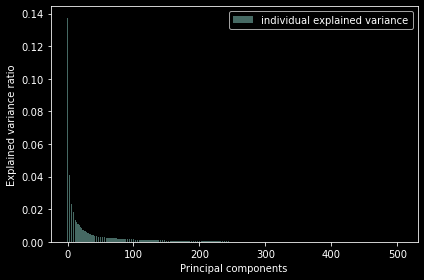

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(X_train)), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio of  5  Components:
[0.13750464 0.09518379 0.0894483  0.04097621 0.03406102]


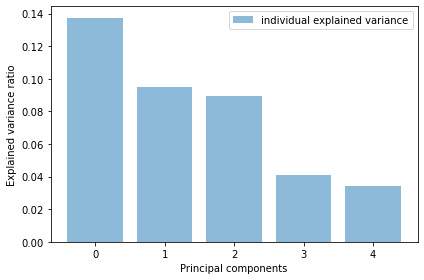

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.52      0.59        52
           1       0.88      0.93      0.91       198

    accuracy                           0.85       250
   macro avg       0.78      0.73      0.75       250
weighted avg       0.84      0.85      0.84       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]

 Accuracy: 
 84.8

 Precision of event Happening: 
 88.09523809523809

 Recall of event Hap

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Prediction Vector: 
 [1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1
 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]

 Accuracy: 
 80.4

 Precision of event Happening: 
 86.69950738916256

 Recall of event Happening: 
 88.88888888888889

 AUC: 
 0.6848290598290598

 F-Score:
 0.8778054862842892

 Confusion Matrix: 
 [[ 25  27]
 [ 22 176]]
Explained Variance Ratio of  10  Components:
[0.13750464 0.09518379 0.0894483  0.04097621 0.03406102 0.03155075
 0.0231409  0.02217981 0.02056051 0.01834452]


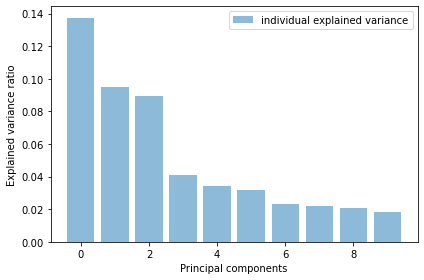

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58        52
           1       0.89      0.88      0.89       198

    accuracy                           0.82       250
   macro avg       0.73      0.74      0.74       250
weighted avg       0.83      0.82      0.83       250

Prediction Vector: 
 [1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1]

 Accuracy: 
 82.39999999999999

 Precision of event Happening: 
 89.28571428571429

 Recall

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Prediction Vector: 
 [1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]

 Accuracy: 
 80.0

 Precision of event Happening: 
 86.27450980392157

 Recall of event Happening: 
 88.88888888888889

 AUC: 
 0.6752136752136753

 F-Score:
 0.8756218905472637

 Confusion Matrix: 
 [[ 24  28]
 [ 22 176]]
Explained Variance Ratio of  15  Components:
[0.13750464 0.09518379 0.0894483  0.04097621 0.03406102 0.03155075
 0.02314092 0.02217984 0.02056116 0.01834488 0.01766604 0.01592611
 0.01357762 0.01289251 0.01184907]


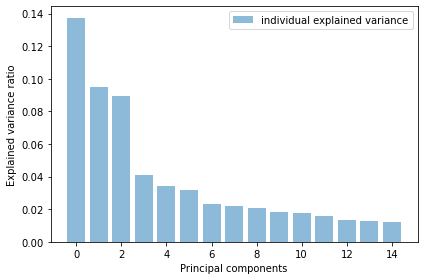

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        52
           1       0.89      0.89      0.89       198

    accuracy                           0.83       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.83      0.83      0.83       250

Prediction Vector: 
 [1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1]

 Accuracy: 
 83.2

 Precision of event Happening: 
 89.39393939393939

 Recall of event Hap

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.46      0.48        52
           1       0.86      0.88      0.87       198

    accuracy                           0.80       250
   macro avg       0.69      0.67      0.68       250
weighted avg       0.79      0.80      0.79       250

Prediction Vector: 
 [1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]

 Accuracy: 
 79.60000000000001

 Precision of event Happening: 
 86.20689655172413

 Recall of event Happening: 
 88.383

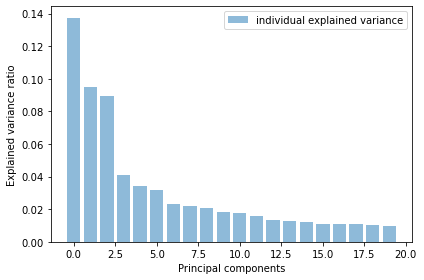

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        52
           1       0.90      0.92      0.91       198

    accuracy                           0.86       250
   macro avg       0.78      0.77      0.78       250
weighted avg       0.85      0.86      0.85       250

Prediction Vector: 
 [1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1]

 Accuracy: 
 85.6

 Precision of event Happening: 
 90.0990099009901

 Recall of event Happ

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.54      0.57        52
           1       0.88      0.91      0.90       198

    accuracy                           0.83       250
   macro avg       0.75      0.72      0.73       250
weighted avg       0.83      0.83      0.83       250

Prediction Vector: 
 [1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1]

 Accuracy: 
 83.2

 Precision of event Happening: 
 88.23529411764706

 Recall of event Happening: 
 90.9090909090909

 

In [27]:
from sklearn.decomposition import PCA
def select_features(X_train, X_test,n):
    global pca
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    pca = PCA(n_components = n)
    X_train_fs = pca.fit_transform(X_train)
    X_test_fs = pca.transform(X_test)
    return X_train_fs, X_test_fs
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs = select_features(X_train, X_test,n)
    
    print ("Explained Variance Ratio of ",n," Components:")
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(n), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    # fit the model
    print ("Logistic Regression From PCA")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From PCA")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From PCA")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From PCA")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    

# Interpretation
- Logistic Regression with PCA performs well with 5 components with an accuracy of 84, precision 88, recall 93.
- SVM with PCA performs well with 10 components with an accuracy of 84, precision 86, recall 95.
- RF with PCA performs well with 10 components with an accuracy of 86, precision 89, recall 93.
- Xgboost with PCA performs well with 20 components with an accuracy of 83, precision 88, recall 90.

We concluded that PCA is useful in dimensionality reduction of the dataset as Logistic Regression with 5 componenets perform well from all of them.

# 6- LDA

[1.]


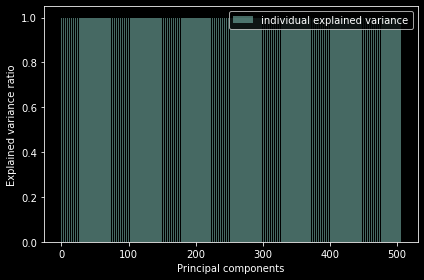

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
y_train = y_train.to_numpy(dtype='int')
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)
explained_variance = lda.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(X_train)), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio
[0.13750464 0.09518379 0.0894483  0.04097621 0.03406102 0.03155075
 0.02314092 0.02217984 0.02056116 0.01834489 0.01766605 0.01592611
 0.01357776 0.01289392 0.01185156 0.01122039 0.01101717 0.01082133
 0.01028134 0.0094322 ]


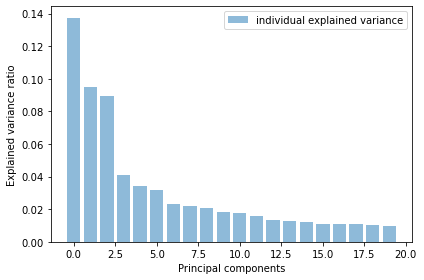

Logistic Regression From LDA
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.77      0.57        52
           1       0.93      0.76      0.83       198

    accuracy                           0.76       250
   macro avg       0.69      0.76      0.70       250
weighted avg       0.83      0.76      0.78       250

Prediction Vector: 
 [1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0
 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1]

 Accuracy: 
 76.0

 Precision of event Happening: 
 92.5925925925926

 Recall of event Happ

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'accuracy': 76.0,
 'precision': 92.5925925925926,
 'recall': 75.75757575757575,
 'auc_val': 0.7634032634032634,
 'f_score': 0.8333333333333334,
 'model_obj': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.01, max_delta_step=0,
               max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, predictor='auto', random_state=1,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)}

In [42]:
def select_features(X_train, X_test,y_train):
    global lda
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    y_train = y_train.to_numpy(dtype='int')
    lda = LinearDiscriminantAnalysis(solver='svd')
    X_train_fs = lda.fit_transform(X_train,y_train)
    X_test_fs = lda.transform(X_test)
    return X_train_fs, X_test_fs
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection

X_train_fs, X_test_fs  = select_features(X_train, X_test,y_train)
    
print ("Explained Variance Ratio")
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
plt.figure(figsize=(6, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
    
    # fit the model
print ("Logistic Regression From LDA")
LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
print ("SVM From LDA")
SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
print ("RM From LDA")
RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
print ("Xgboost From LDA")
XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    

# Interpretation
TSNE doesnot perform on less number of components. It doesnot reduce the dimensionality of dataset.
Logistic Regression, Xgboost, RF all perform well with 20 components except SVM.

# TSNE

In [35]:
from sklearn.manifold import TSNE
def select_features(X_train, X_test,n):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    tsne = TSNE(n_components = n)
    X_train_fs = tsne.fit_transform(X_train)
    X_test_fs = tsne.fit_transform(X_test)
    return X_train_fs, X_test_fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(1,4):
    X_train_fs, X_test_fs  = select_features(X_train, X_test,n)
    # fit the model
    print ("Logistic Regression From TSNE")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From TSNE")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From TSNE")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From TSNE")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)


C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Logistic Regression From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      1.00      0.88       198

    accuracy                           0.79       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.79      0.70       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

 Accuracy: 
 79.2

 Precision of event Happening: 
 79.2

 Recall of event Happening: 
 10

C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classificat

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.15      0.15        52
           1       0.77      0.76      0.77       198

    accuracy                           0.63       250
   macro avg       0.46      0.46      0.46       250
weighted avg       0.64      0.63      0.64       250

Prediction Vector: 
 [1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0]

 Accuracy: 
 63.2

 Precision of event Happening: 
 77.31958762886599

 Recall of event Happening: 
 75.75757575757575



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\H

Logistic Regression From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.79      1.00      0.88       198

    accuracy                           0.79       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.79      0.70       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

 Accuracy: 
 79.2

 Precision of event Happening: 
 79.2

 Recall of event Happening: 
 10

C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.76      0.84      0.80       198

    accuracy                           0.66       250
   macro avg       0.38      0.42      0.40       250
weighted avg       0.60      0.66      0.63       250

Prediction Vector: 
 [1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1]

 Accuracy: 
 66.4

 Precision of event Happening: 
 76.14678899082568

 Recall of event Happening: 
 83.83838383838383



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Prediction Vector: 
 [1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]

 Accuracy: 
 68.4

 Precision of event Happening: 
 76.92307692307693

 Recall of event Happening: 
 85.85858585858585

 AUC: 
 0.4389083139083139

 F-Score:
 0.81145584725537

 Confusion Matrix: 
 [[  1  51]
 [ 28 170]]


C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Logistic Regression From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.40      0.40        52
           1       0.84      0.83      0.84       198

    accuracy                           0.74       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.75      0.74      0.75       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1]

 Accuracy: 
 74.4

 Precision of event Happening: 
 84.18367346938776

 Recall of event Ha

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.33      0.32        52
           1       0.82      0.81      0.82       198

    accuracy                           0.71       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.72      0.71      0.71       250

Prediction Vector: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1]

 Accuracy: 
 71.2

 Precision of event Happening: 
 82.14285714285714

 Recall of event Happening: 
 81.31313131313132



# Interpretation
- Logistic Regression with TSNE performs well with 1 component with an accuracy of 79, precision 79, recall 100.
- SVM with TSNE performs well with 1 component with an accuracy of 79, precision 79, recall 100.
- RF with TSNE performs well with 3 components with an accuracy of 70, precision 80.3, recall 82.8.
- Xgboost with TSNE performs well with 3 components with an accuracy of 71, precision 82, recall 81.

We concluded that TSNE is useful in dimensionality reduction of the dataset as Logistic Regression with 1 componenet perform well from all of them.